# Draw phylogenies of Ireland and global M. bovis samples

<div class="alert alert-block alert-info"><b>R Script to draw trees</b> </div>

In [ ]:
source('drawtrees.R')

In [2]:
options(repr.plot.width=20, repr.plot.height=15)

In [3]:
setwd('/storage/btbgenie/combined_results/')
meta <- read.table('/storage/btbgenie/combined_results/metadata.csv',sep=',',
                      header=TRUE,row.names=2)
print (length(rownames(meta)))
meta[is.na(meta)] <- "-"
meta[] <- lapply(meta, as.character)

gltree <- read.tree('/storage/btbgenie/global_results/tree.newick')
meta1 <- read.table('/storage/btbgenie/global_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
meta1[] <- lapply(meta1, as.character)
print (length(rownames(meta1)))
mltree <- read.tree('/storage/btbgenie/combined_results/tree.newick')

meta2 <- read.table('/storage/btbgenie/all_ireland_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
meta2[] <- lapply(meta2, as.character)
iretree <- read.tree('/storage/btbgenie/all_ireland_results/tree.newick')

[1] 778
[1] 211


In [4]:
length(gltree$tip.label)

[1] 212

In [5]:
randtips<-sample(iretree$tip.label,80)
randtree <- keep.tip(iretree, randtips)
#ggtreefruit(randtree, meta2, col1='county')

Warning message:
“Removed 1 rows containing missing values (geom_point_g_gtree).”


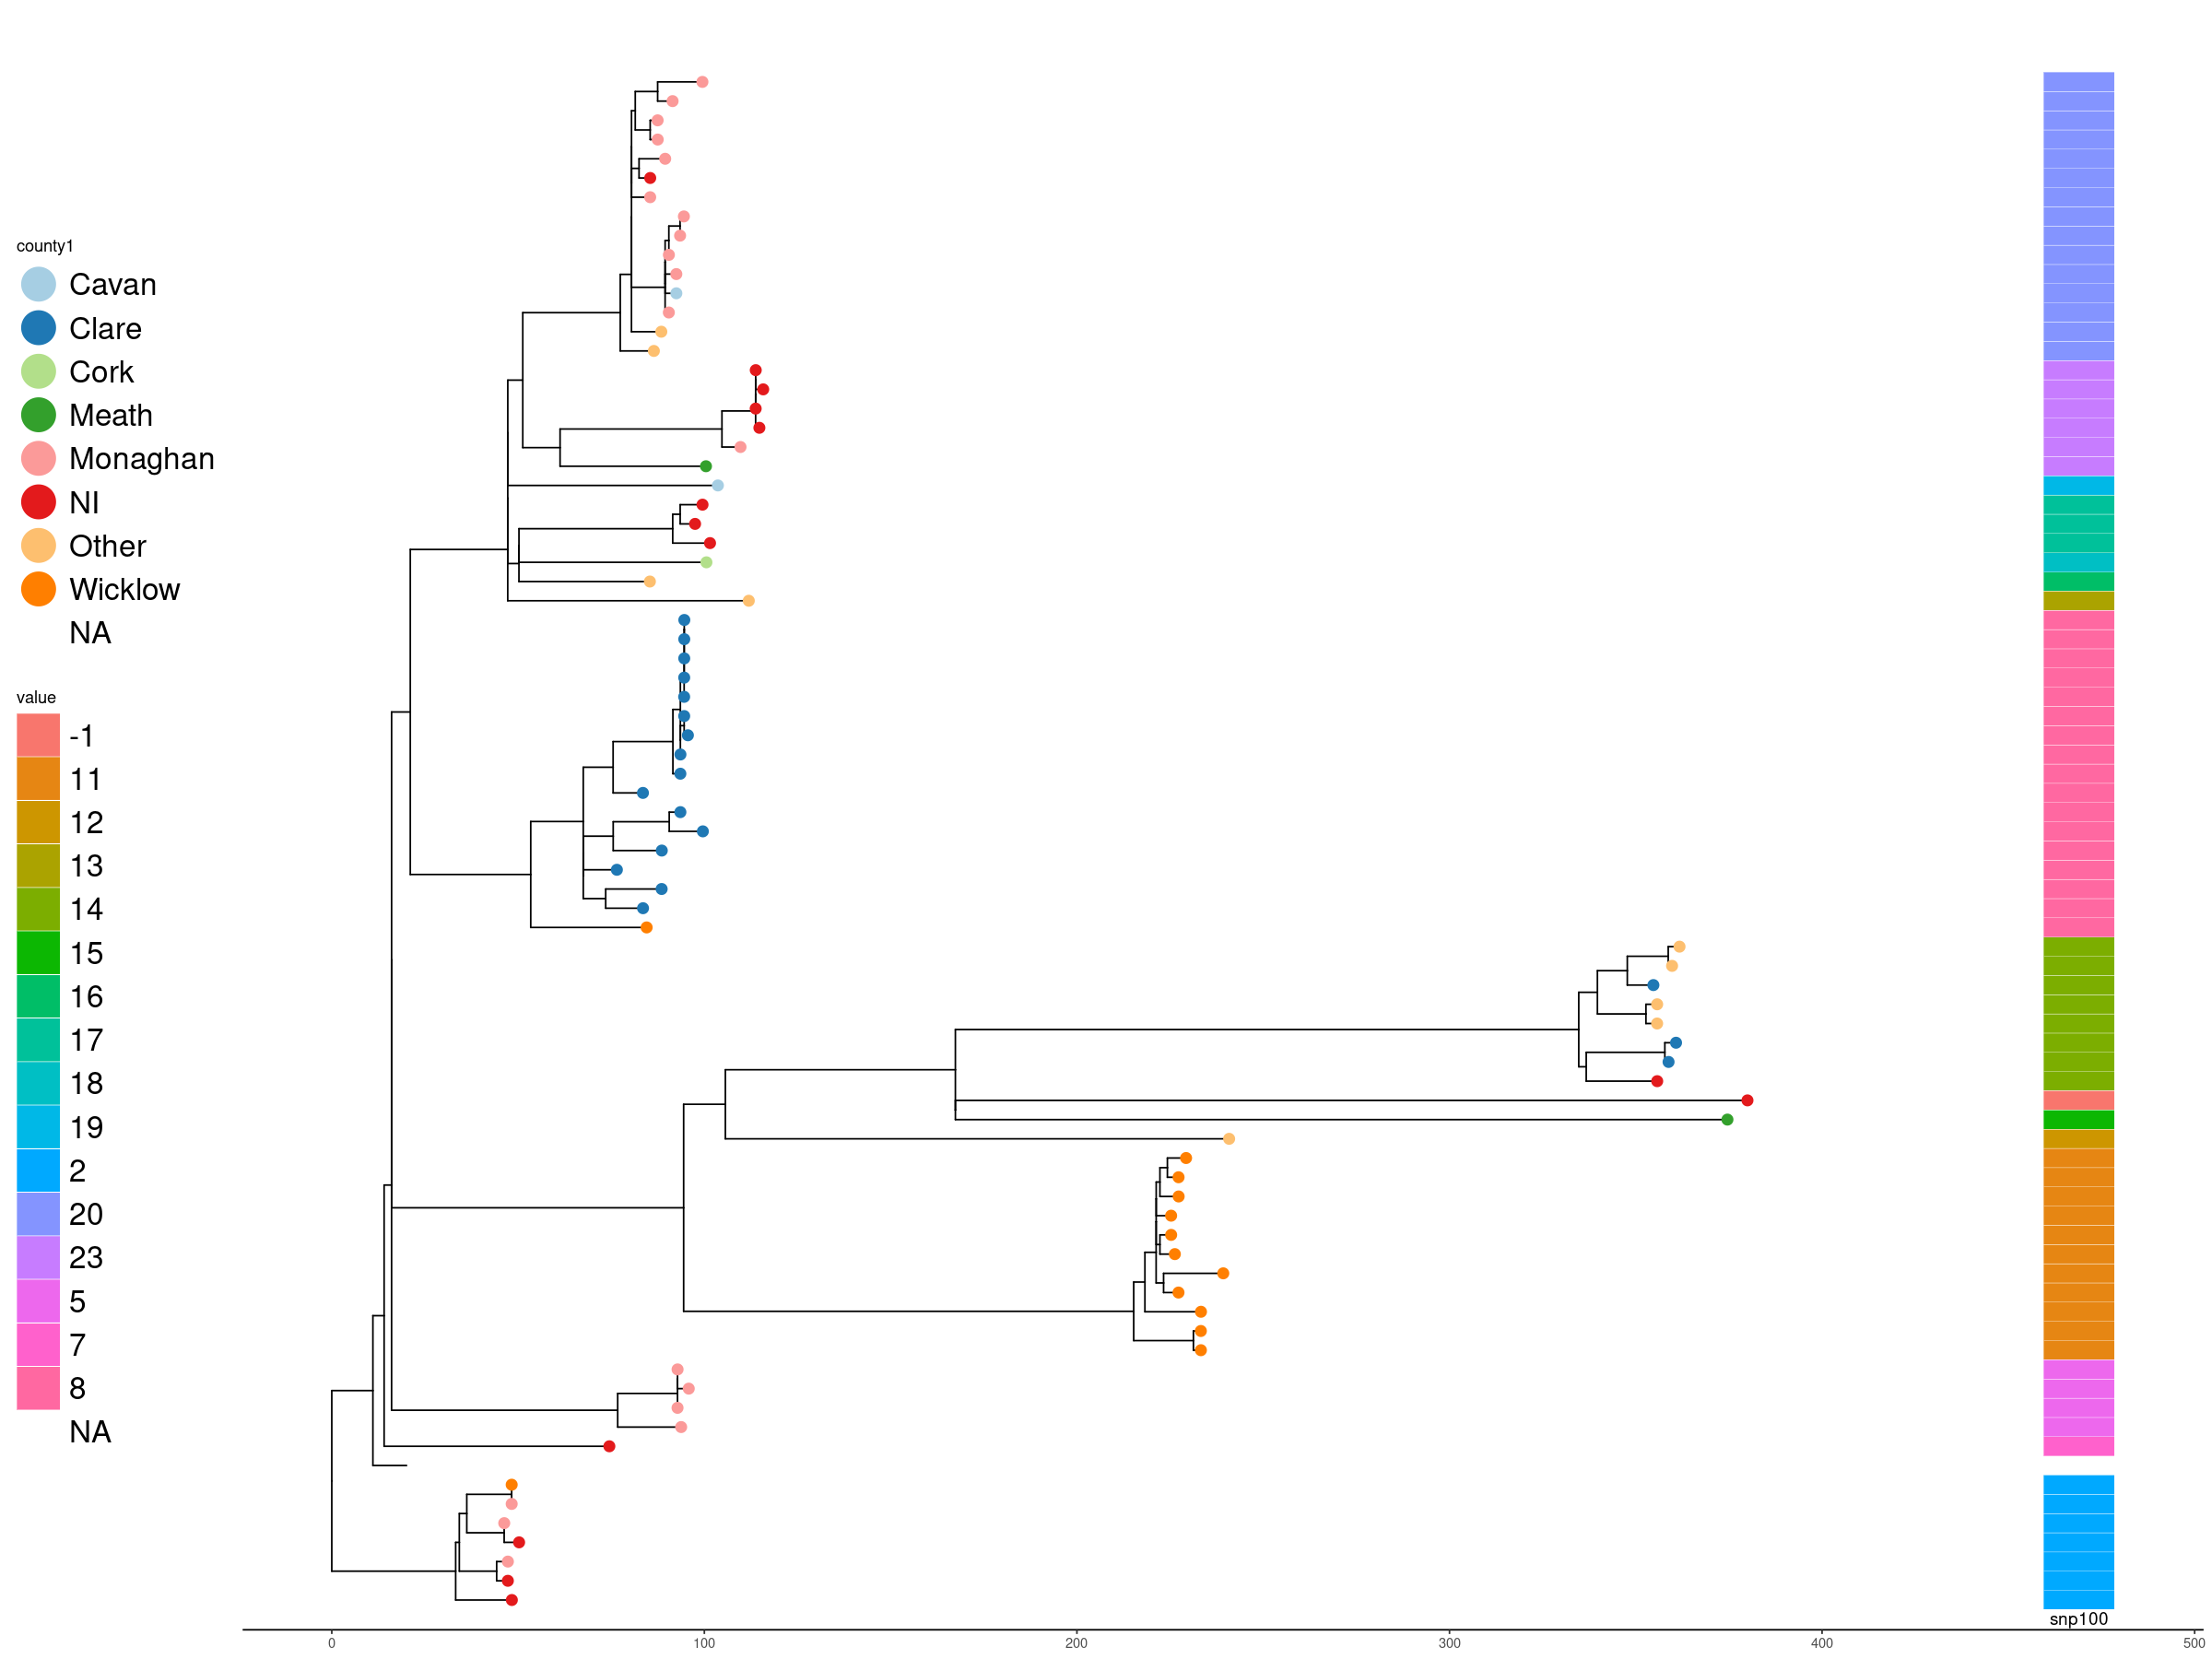

In [6]:
ggplottree(randtree, meta2, layout='rect','county1', 'snp100', cmap='Paired')
#labels <- list(Wicklow=10,Monaghan=20)
#p<-labelclades(p, labels)
#highlightclades(p)

## global

In [ ]:
tips<-row.names(meta[(meta$cc %in% c('La2','La3')),])
stree <- drop.tip(gltree, tips)
ggplottree(stree, meta1, layout='c', 'Clonal_Complex','SB', cmap='Paired')

In [633]:
colnames(meta1)

[1] "filename1"                             
 [2] "filename2"                             
 [3] "name1"                                 
 [4] "name2"                                 
 [5] "read_length"                           
 [6] "bam_file"                              
 [7] "mapped"                                
 [8] "reads"                                 
 [9] "perc_mapped"                           
[10] "Accession_Number"                      
[11] "Clonal_Complex"                        
[12] "Country"                               
[13] "Gnumber"                               
[14] "Host"                                  
[15] "Map"                                   
[16] "SIB_Number"                            
[17] "Sample.included.in.Loiseau.et.al..2020"
[18] "Unnamed..0"                            
[19] "SB"                                    
[20] "code"                                  
[21] "RD1mic"                                
[22] "RD5"                                   
[23] "RDWicklow"

## ancestral state reconstruction

In [ ]:
phy <- root(gltree, outgroup='ref')
phy$edge.length[phy$edge.length==0]<-max(nodeHeights(phy))*1e-6
data <- meta1[phy$tip.label, ]
rd <- data$RDWicklow
MLrec <- ace(rd, phy, type="discrete", method="ML")
rd

## combined, global + Ireland

Warning message:
“Removed 2 rows containing missing values (geom_point_g_gtree).”


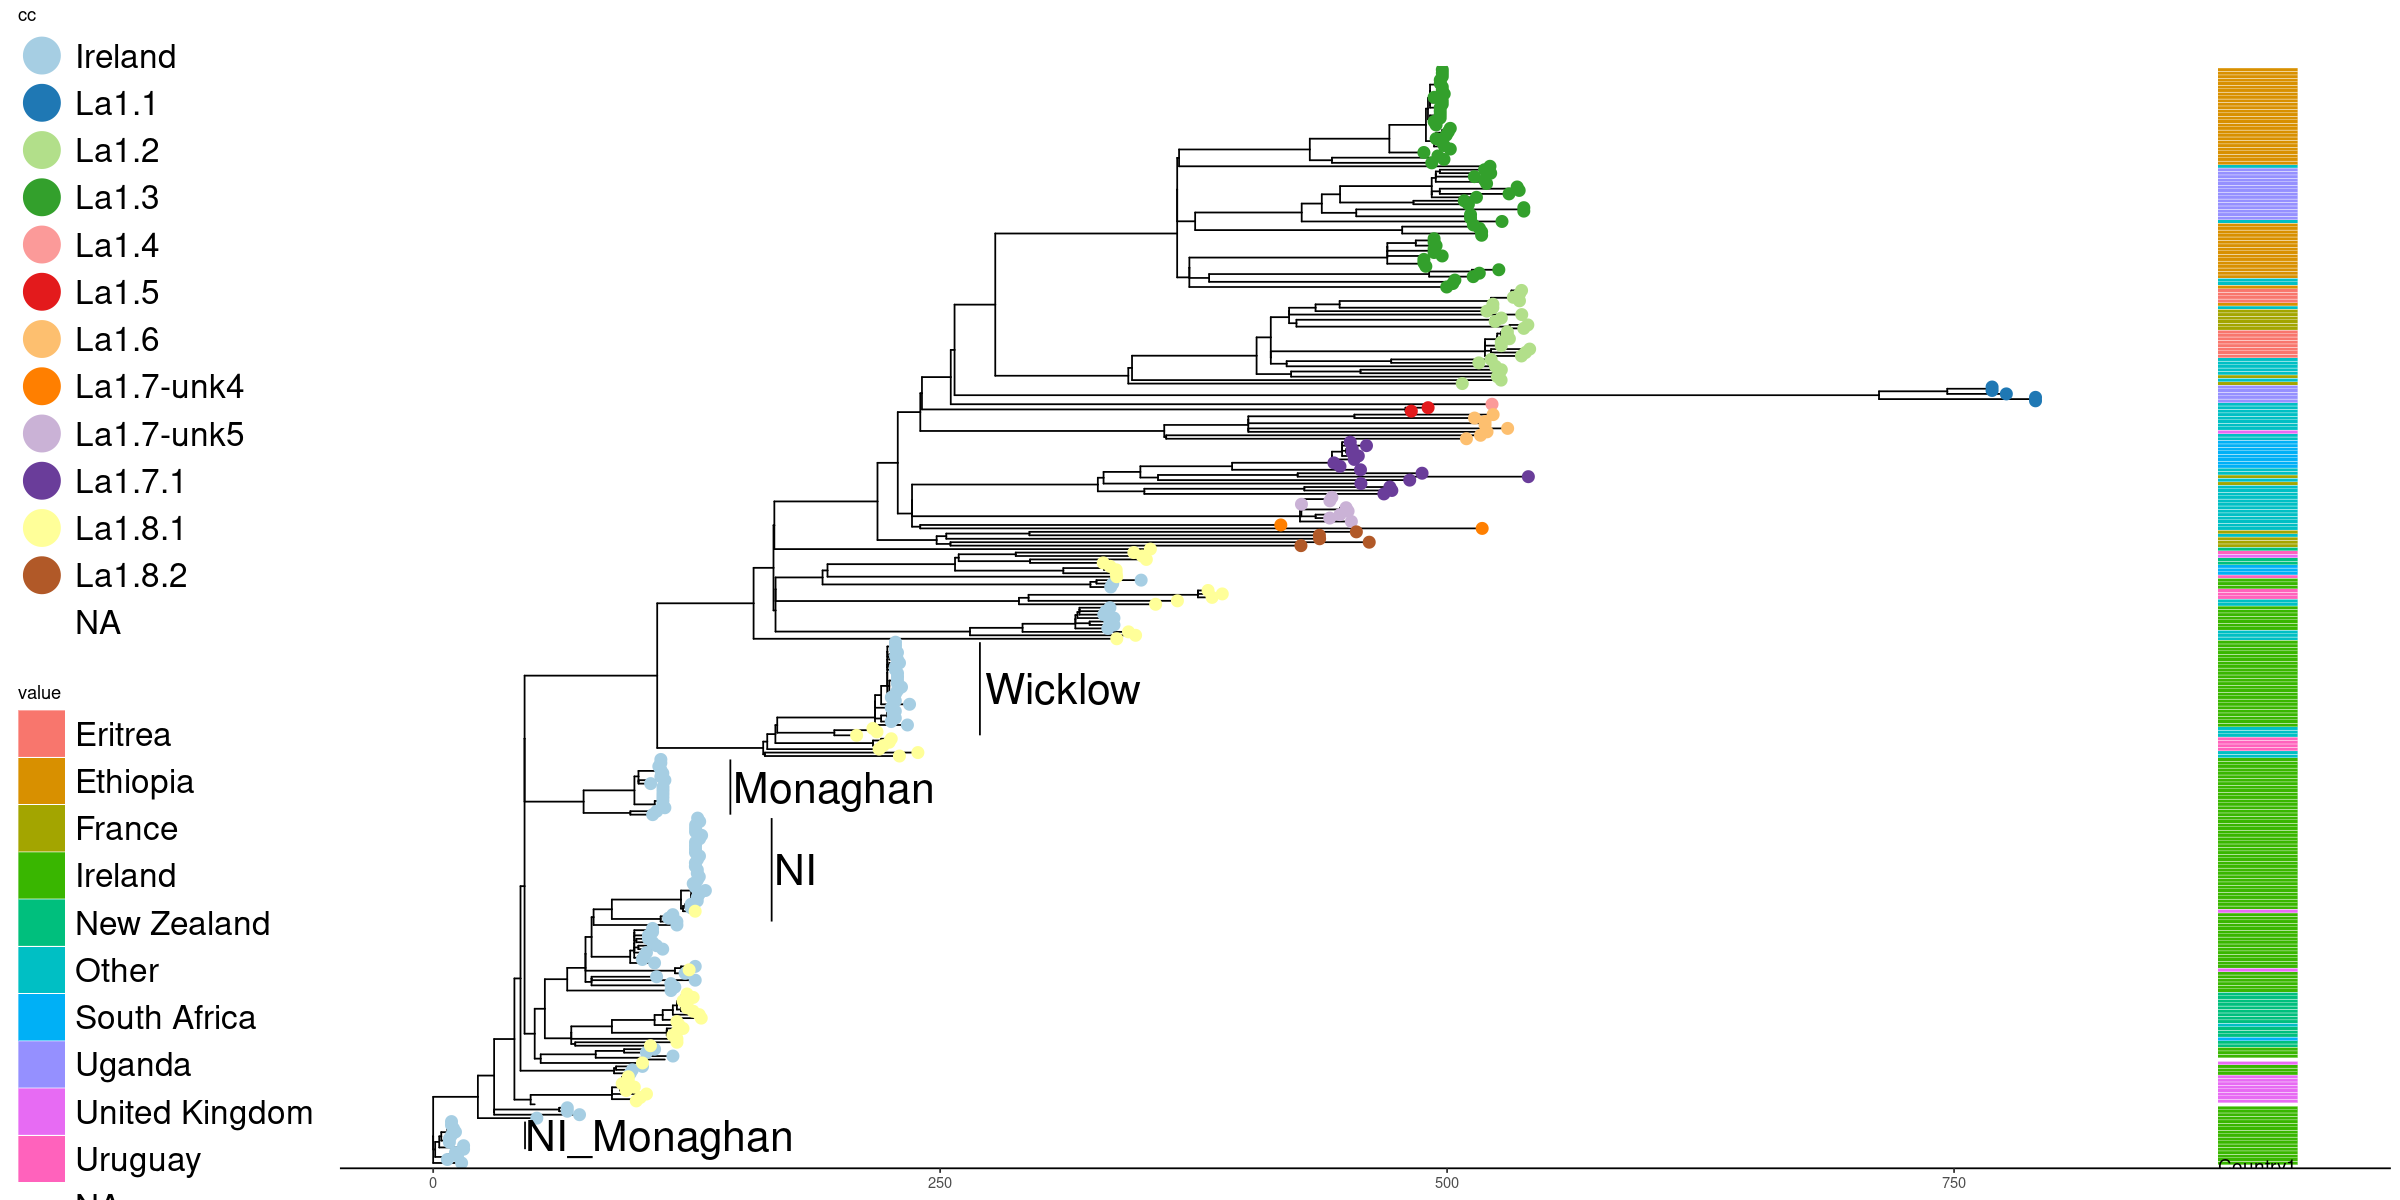

In [79]:
options(repr.plot.width=20, repr.plot.height=10)
tips<-row.names(meta[(meta$cc %in% c('La2','La3')),])
stree <- drop.tip(mltree, tips)
p<-ggplottree(stree, meta, layout='rect', 'cc','Country1', cmap='Paired', title='')
labels <- list(Wicklow=360,Monaghan=339,NI_Monaghan=321,NI=561)
labelclades(p, labels)

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.366880237060781

Average angle change [2] 0.293394455793662

Average angle change [3] 0.163353790651126

Average angle change [4] 0.161704854579015

Average angle change [5] 0.0880851053349312

Warning message:
“Removed 2 rows containing missing values (geom_point_g_gtree).”


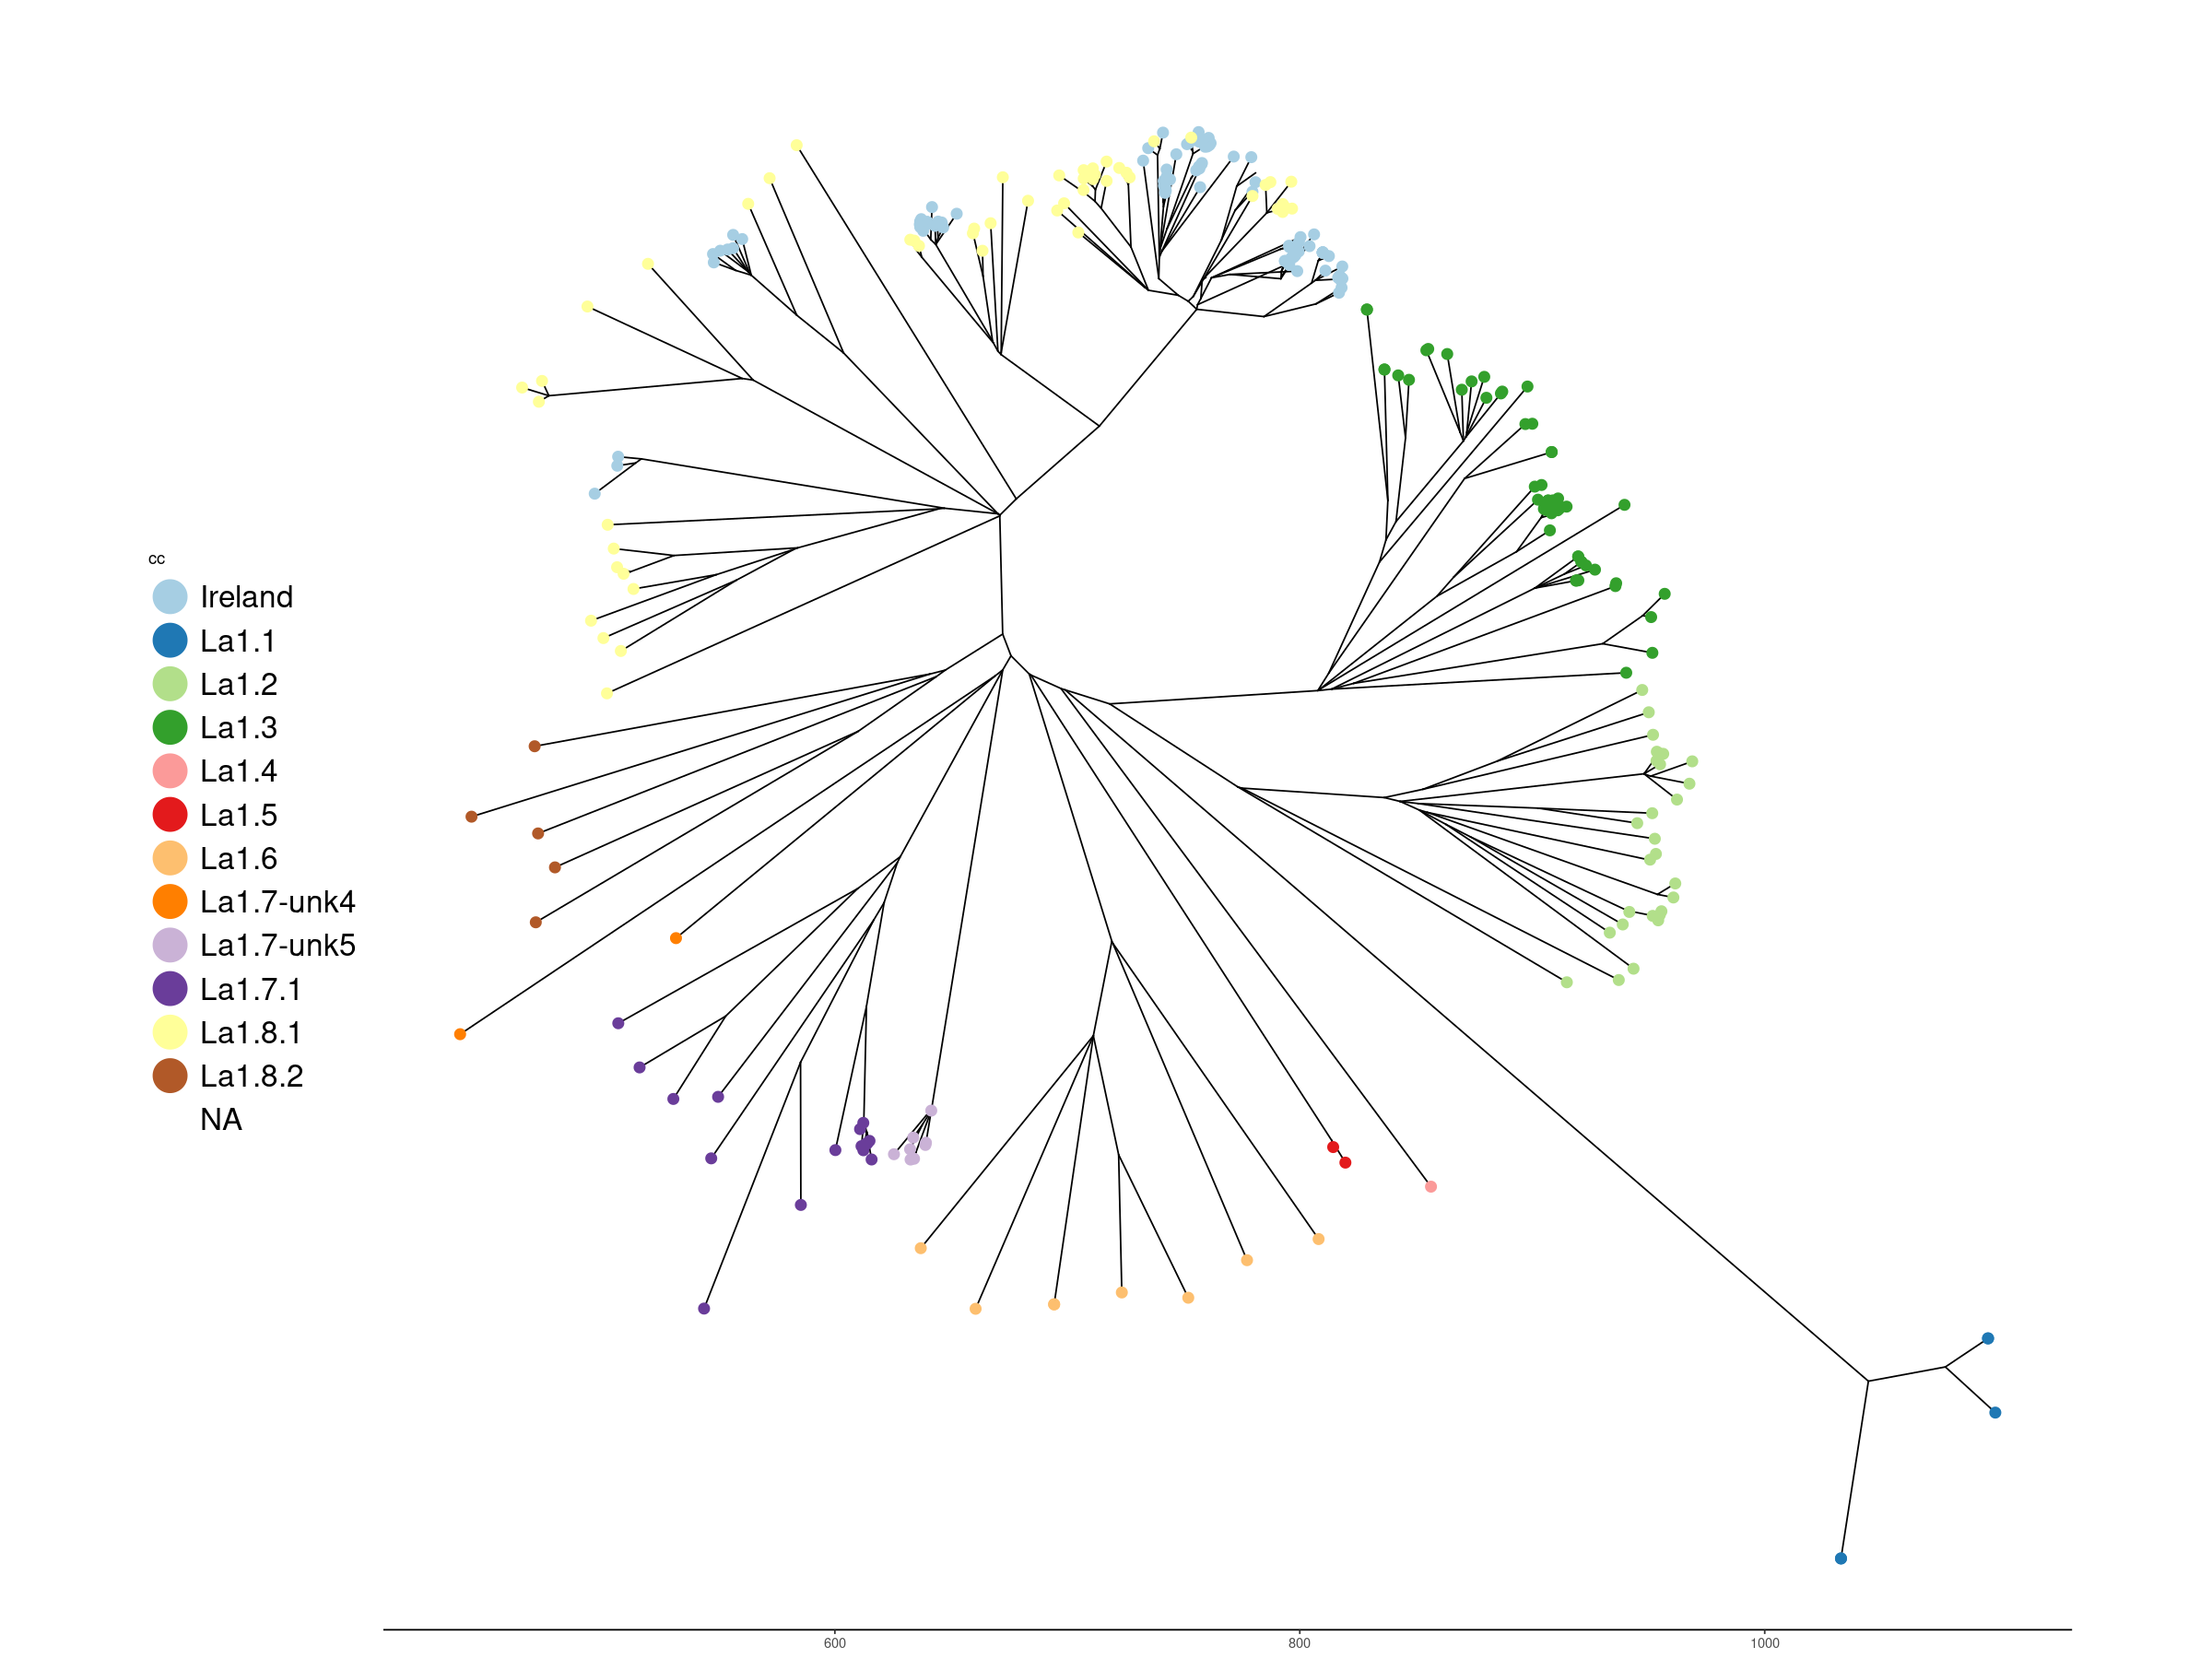

In [73]:
ggplottree(stree, meta, layout='unrooted', 'cc', cmap='Paired')

In [ ]:
#plot_tree(mltree,meta,column='SB1',cmap='Set1')
p<-ggplottree(mltree, meta, 'county1', 'snp100')
labelclades(p)

In [ ]:
#clustered samples only
snp100cl <- c(4, 5, 9, -1, 8, 18, 15, 6, 7, 33, 37, 32, 28, 20, 42, 29, 17, 22, 13)
snp50cl <- c(19, 7, 21, 34, 25, 46, 56, 49, 9, 65, 28, 33, 43, 47, 12, 24, 14, 40)
snp12cl <- c(36, 72, 35, 46, 21, 38, 37, 52, 39, 16, 51, 82, 74, 22, 19, 73, 60, 8, 48)
tips<-row.names(meta[(meta$snp100 %in% snp100cl),])
itree <- keep.tip(mltree, tips)
ggplottree(subtree, meta, 'county1',  'SB1', layout='rect',cmap='Paired',title='global samples, snp50 clusters')

In [555]:
ggplottree(itree, meta, 'Country', cmap='Spectral', title='global samples, snp100 clusters',layout='unrooted')

"daylight" method was used as default layout for unrooted tree.



## Ireland

Warning message:
“Removed 4 rows containing missing values (geom_point_g_gtree).”


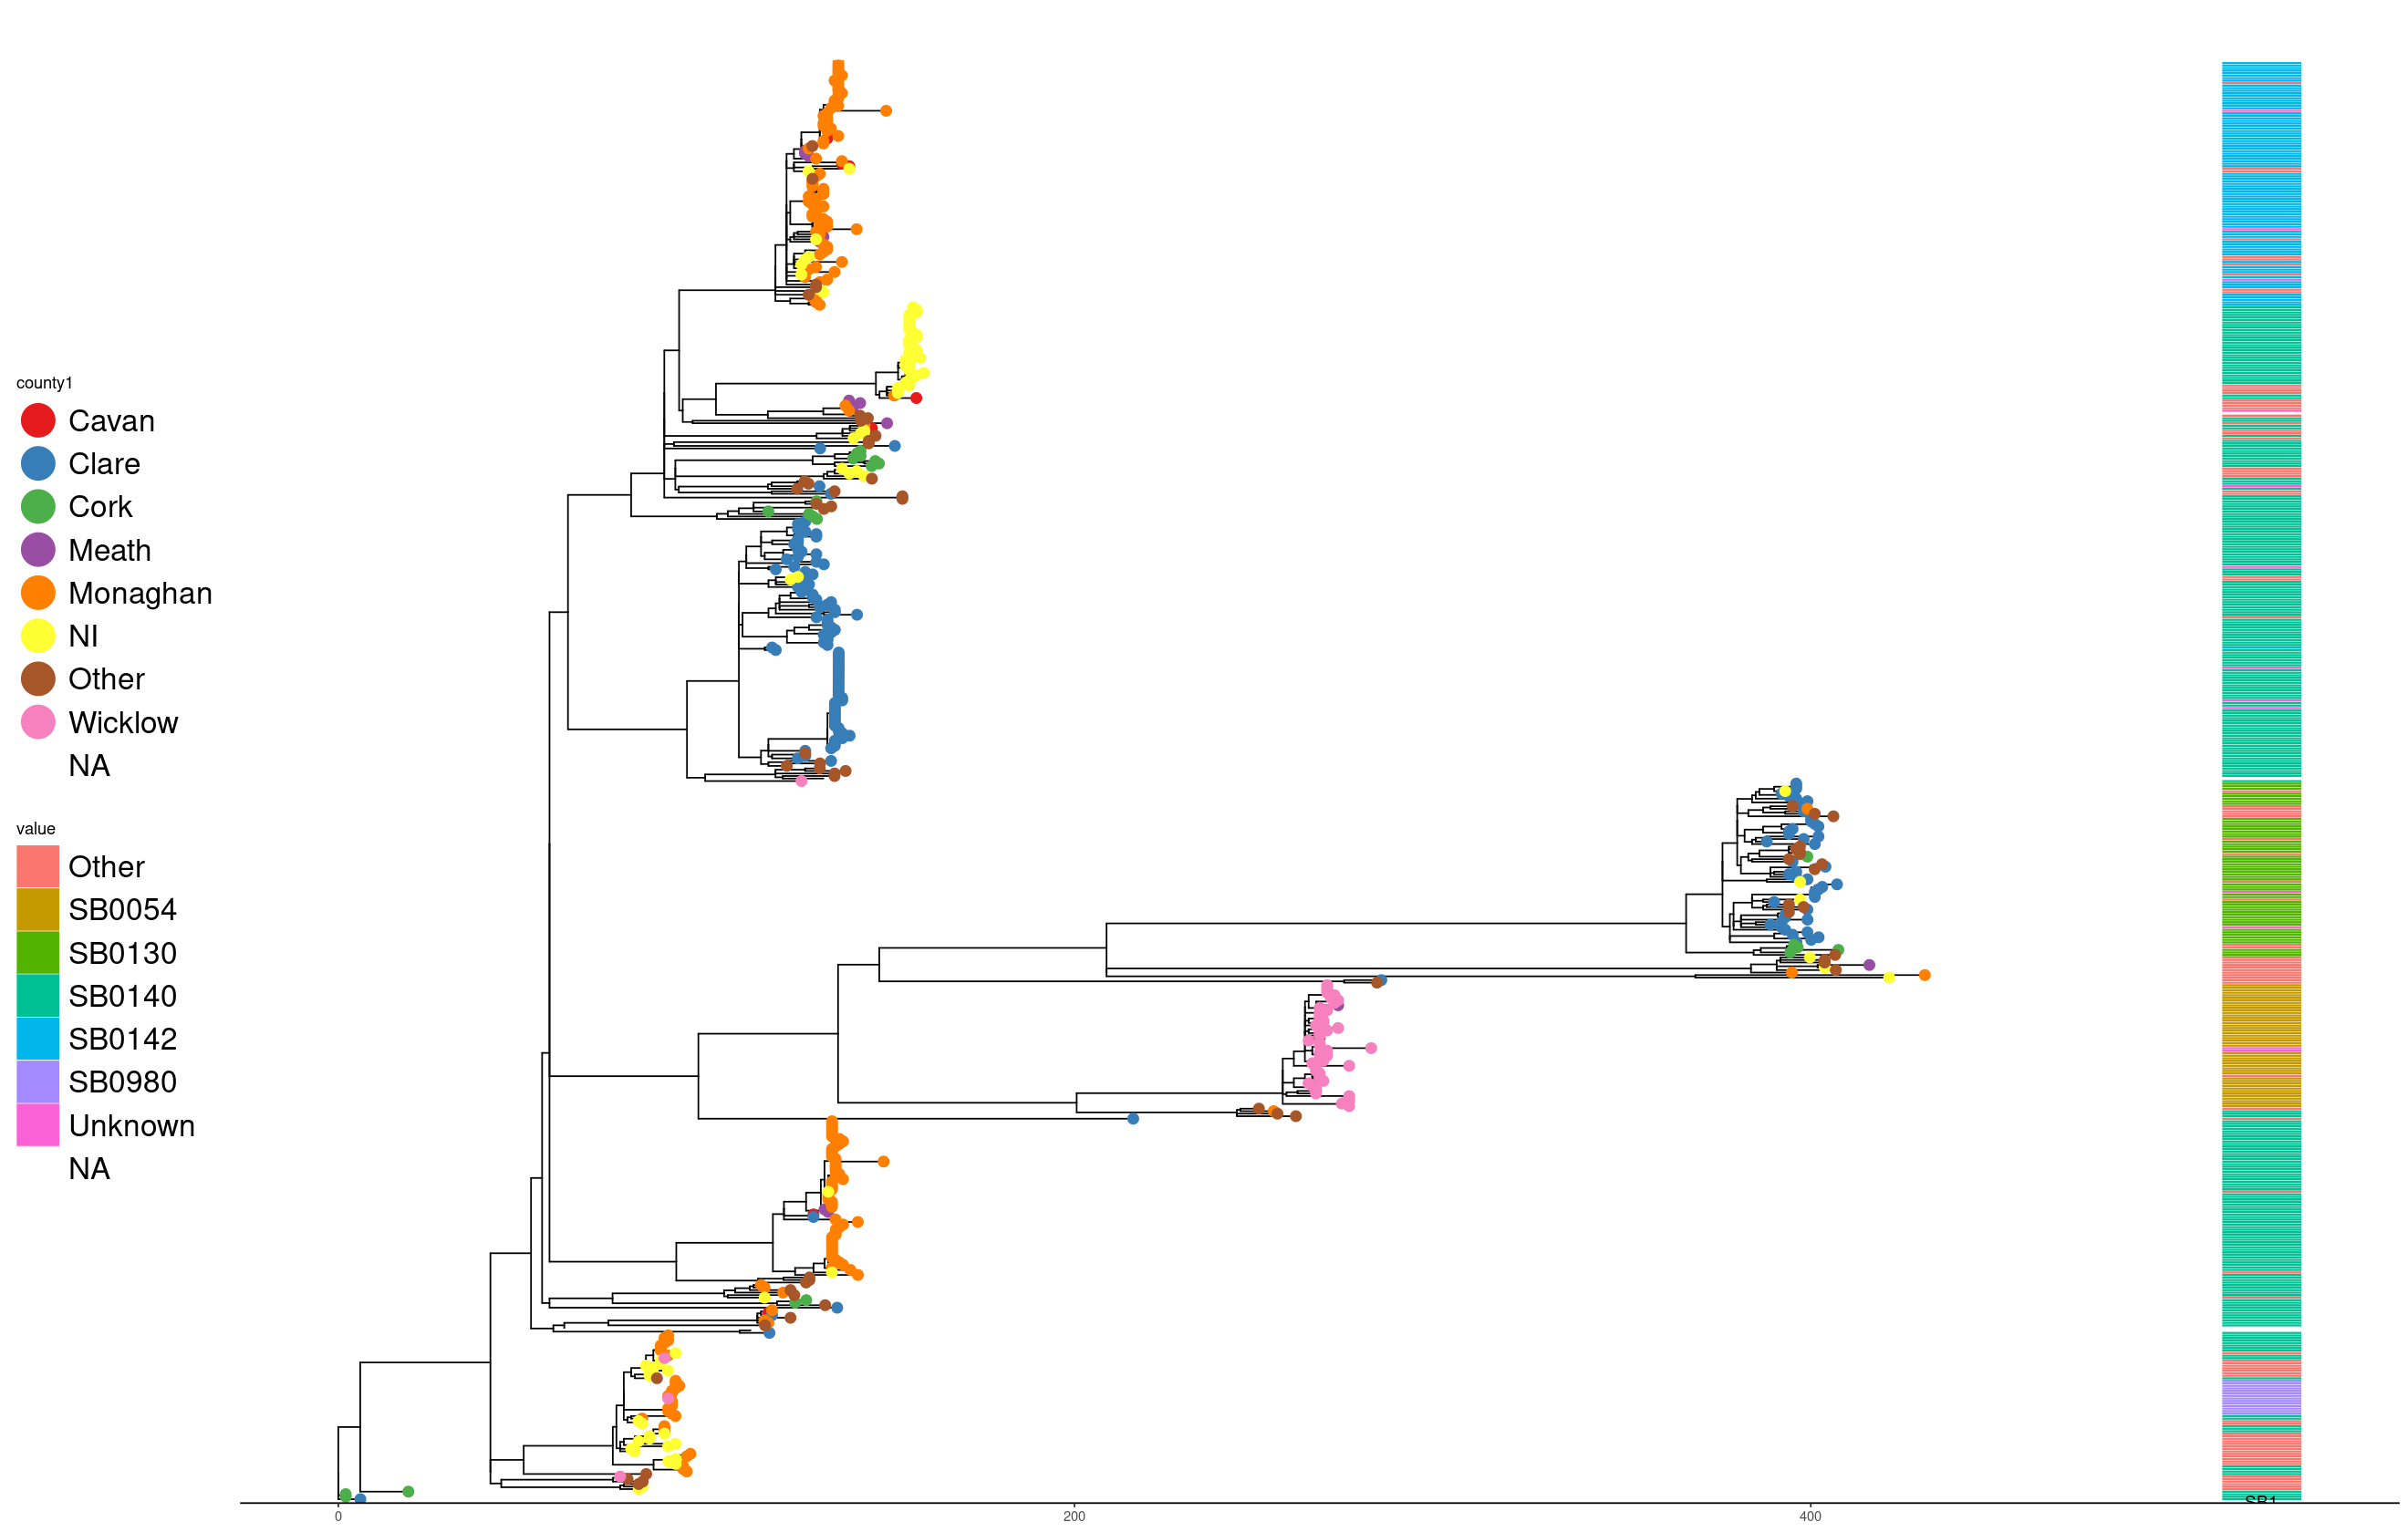

In [86]:
options(repr.plot.width=22, repr.plot.height=14)
randtips<-sample(iretree$tip.label,190)
randtree <- keep.tip(iretree, randtips)
ggplottree(iretree,meta2,'county1','SB1',layout='rect',title='')

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.296240952726745

Average angle change [2] 0.140797082485362

Average angle change [3] 0.177642982459261

Average angle change [4] 0.0675991542708223

Average angle change [5] 0.033682018375616

Warning message:
“Removed 4 rows containing missing values (geom_point_g_gtree).”


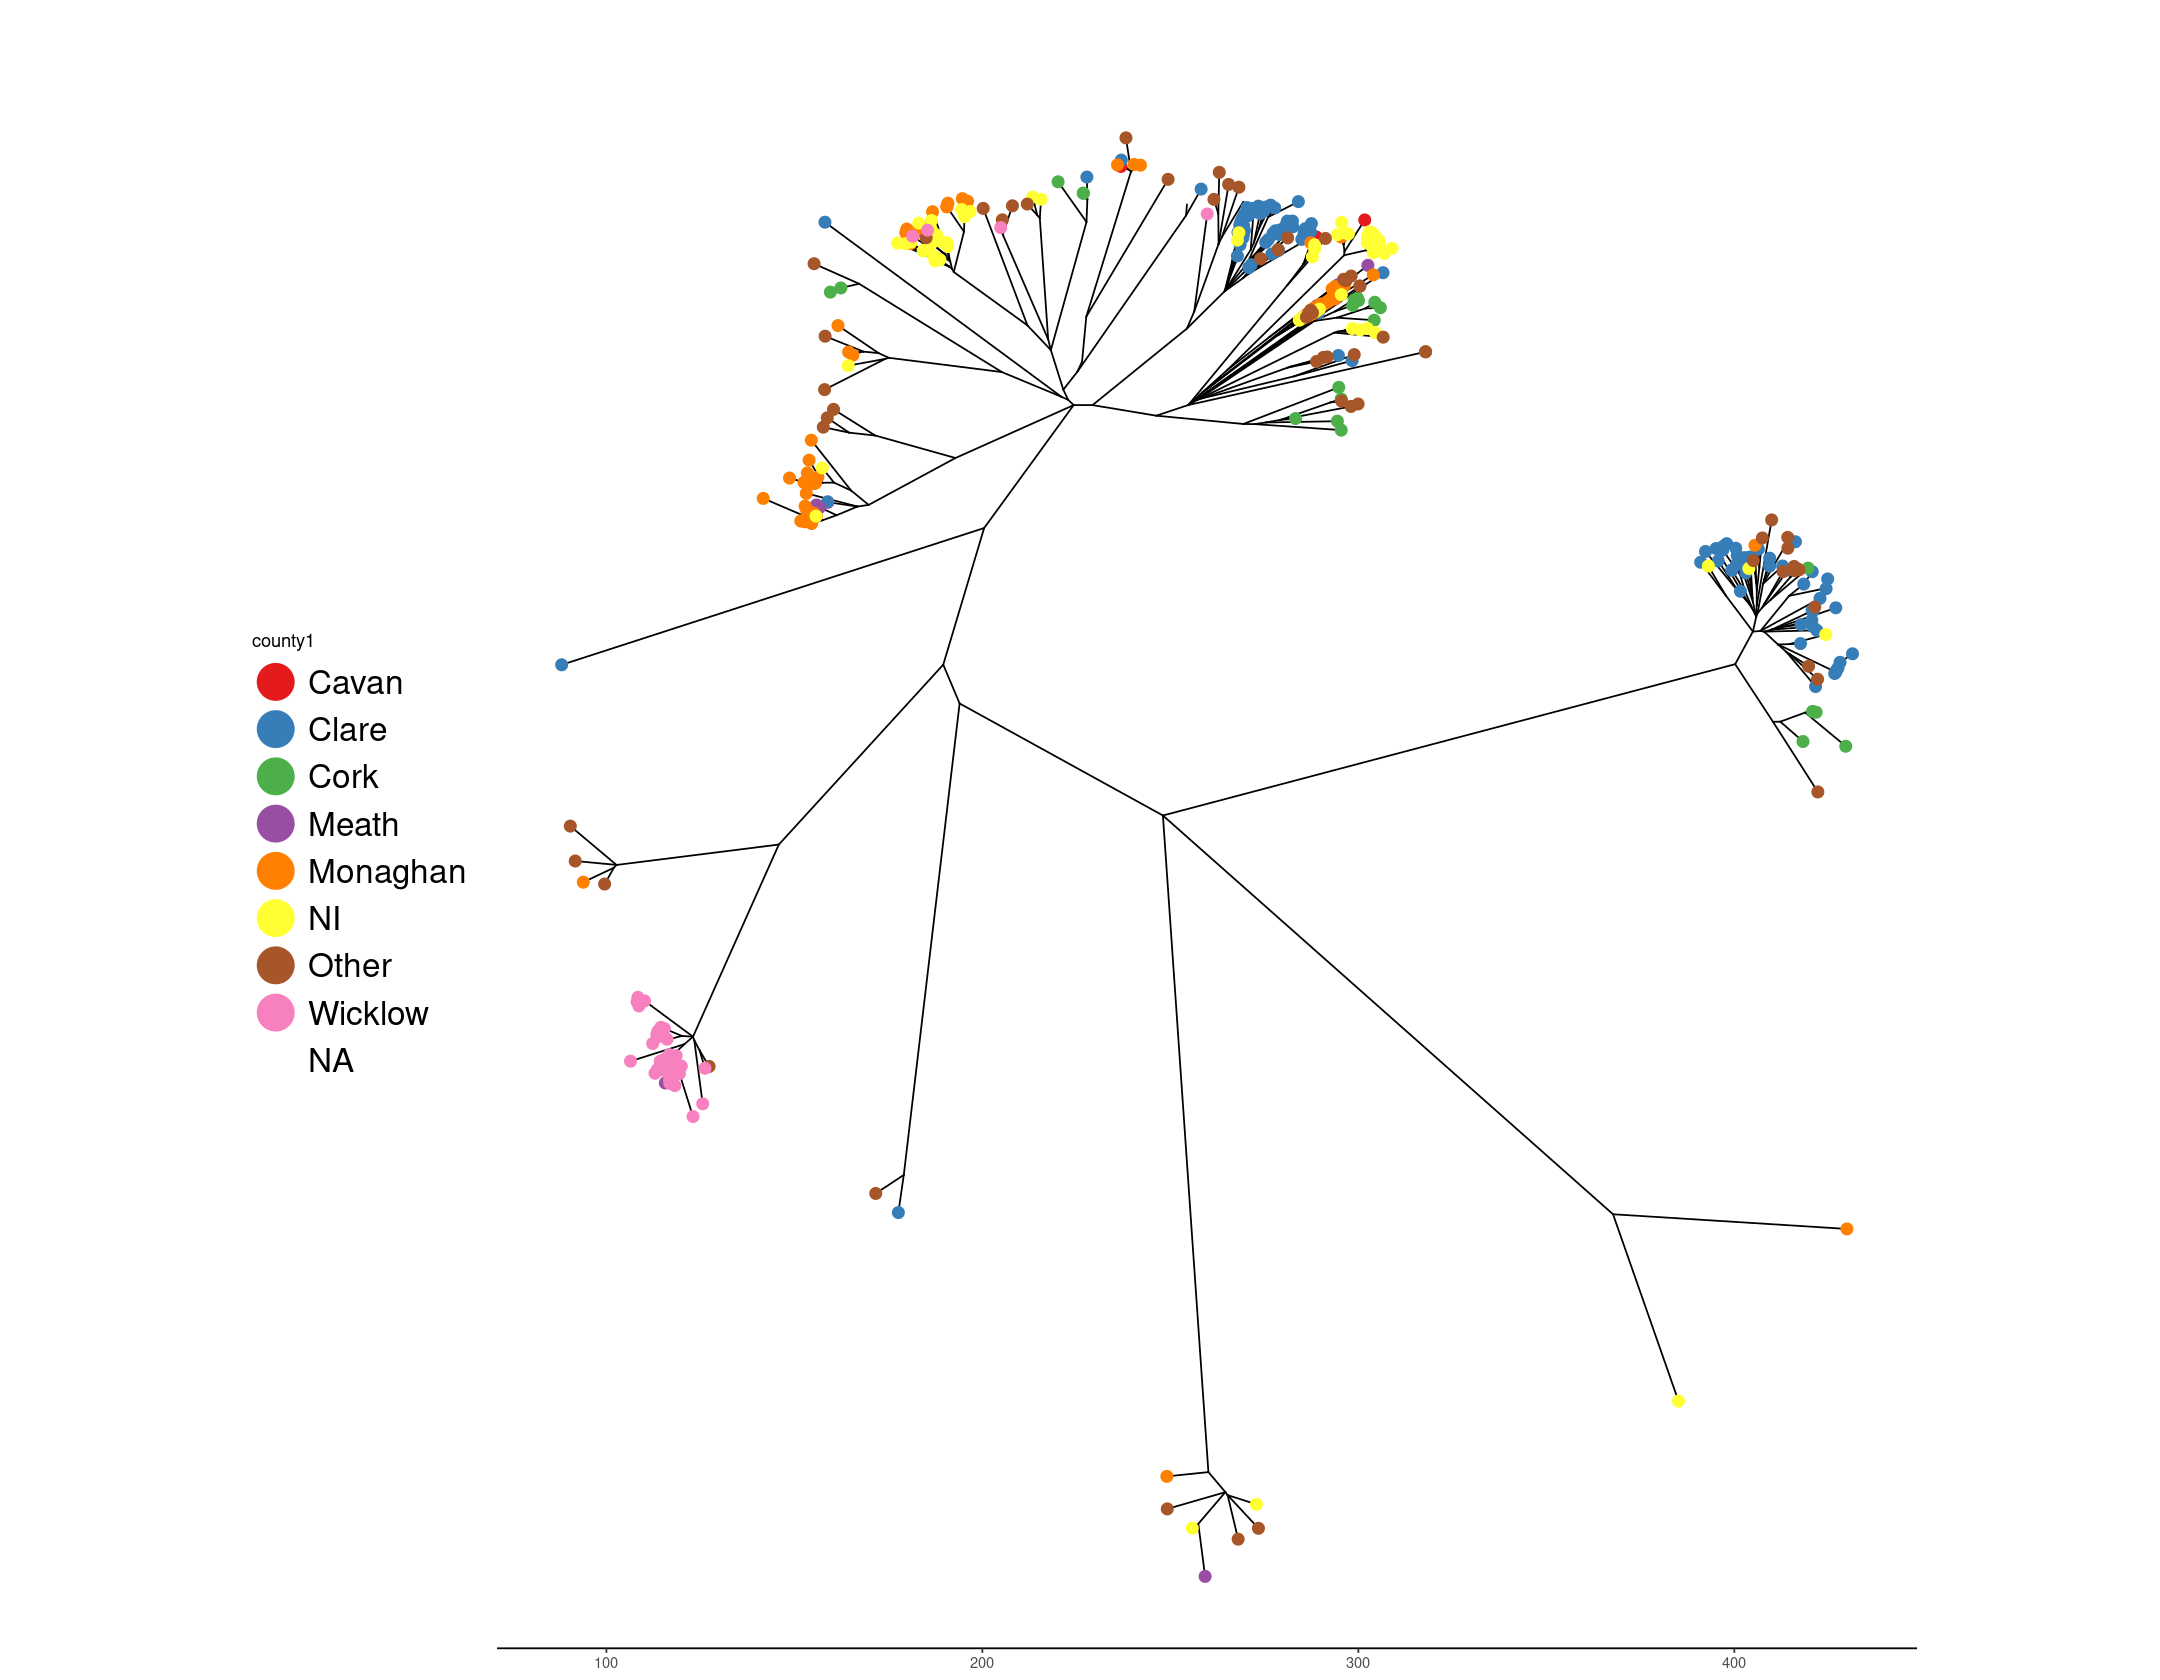

In [83]:
ggplottree(iretree,meta2,'county1',layout='unrooted')